双参数威布尔分布的概率密度函数为：

$$
f(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta-1} \exp\left(-\left(\frac{t}{\eta}\right)^\beta\right)
$$

其中，$t$表示寿命，$\beta$、$\eta$分别为形状参数和特征尺度参数，均大于0。

对应双参数威布尔分布的失效率函数为：

$$
h(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta - 1}
$$

可靠度函数为：

$$
R(t) = \exp\left(-\left(\frac{t}{\eta}\right)^\beta\right)
$$

In [13]:
from pymc import Weibull, Normal
import matplotlib.pyplot as plt
import arviz as az
import numpy as np
import pymc as pm

In [14]:
faults_time = np.array([2000, 2100, 2200, 2215, 2300, 2305, 2315, 2456, 2500, 2500])  # , 2600, 1500
faults_time -= 1900

with pm.Model() as model:
    beta = pm.HalfNormal("beta", sigma=100)
    eta = pm.Normal("eta", mu=100, sigma=100)
    # gamma = pm.Uniform("gamma", 0, 5000)
    faults = pm.Weibull("faults", alpha=beta, beta=eta, observed=faults_time)
    
    step = pm.Metropolis()  # 采用的迭代函数
    trace = pm.sample(1000, tune=2000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [eta]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 15 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


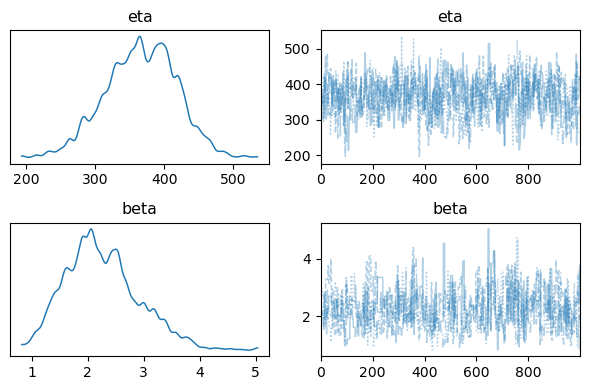

In [15]:
pm.model_graph.model_to_graphviz(model)
    
# 总结后验
az.summary(trace, var_names=[r"beta", r"eta"])
az.plot_trace(trace, figsize=(6, 4), compact=True, legend=False, combined=True)
plt.tight_layout()

In [16]:
y_pred = pm.sample_posterior_predictive(trace, model=model)

Sampling: [faults]


(array([853., 145.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500., 5000.]),
 <BarContainer object of 10 artists>)

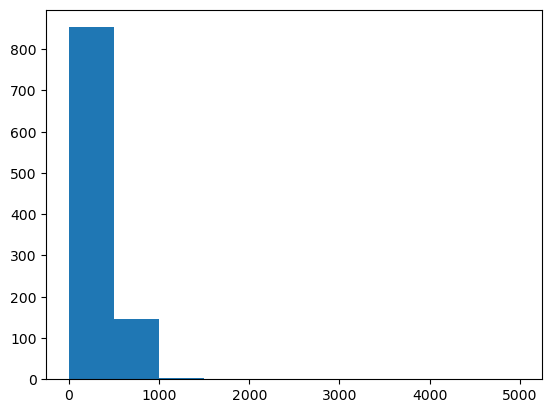

In [17]:
a = y_pred.posterior_predictive["faults"]
a.shape

plt.hist(a[0, :, 6], range=(0, 5000))

In [18]:
faults_time

array([100, 200, 300, 315, 400, 405, 415, 556, 600, 600])

array([<Axes: title={'center': 'eta'}>, <Axes: title={'center': 'beta'}>],
      dtype=object)

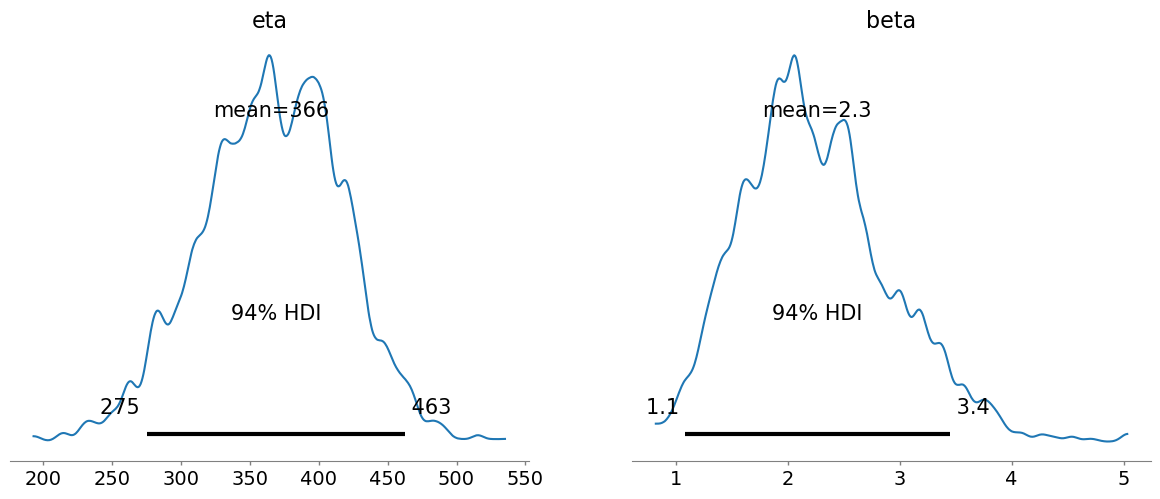

In [19]:
az.plot_posterior(trace)